##INTRODUCTION

Lending Companies work by analyzing the financial history of their loan applicants, and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the applicant then determines the terms of the loan. To acquire these applicants, companies can organically recieve them through their websites/apps, often with the help of advertisement campaigns.
Other times lending companies partner with peer to peer(P2P) lending marketplaces, in order to acquire leads of possible applicants. Some example marketpleces include Upstart, Lending Tree and Lending Club.In this project we are going to assess the quality of the leads of our comapny recieves from these marketplaces.

1. Market: The target audience is the set of loan applicants who reached out through an intermediary markerplace.

2.Product: A loan.

3.Goal: Develop a model to predict for quality applicants. In this case study, quality applicants are those who reach a key part of the loan application process.

In this case study, we will be working for a fintech company that specializes on loans. It offers low APR loans to applicants based on theor financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real time needs. The number of conversions from these leads are satisfactory.

The company tasks you with creating a model that predicts whether or not these leads will complete the electronic signaturephase of the loan application. The company seeks to leverage this model to identify less quality applicants(eg those who are not responding to the onboarding process), and experiment with giving them different boarding screens.

In [25]:
import pandas as pd
from pandas import Series,DataFrame

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import random
import time

random.seed(100)

In [27]:
dataset = pd.read_csv('P39-Financial-Data.csv')

In [28]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [29]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [30]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [31]:
#Cleaning the data
dataset.isna().any()





entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [32]:
dataset2 = dataset.drop(columns= ['entry_id', 'pay_schedule', 'e_signed'])

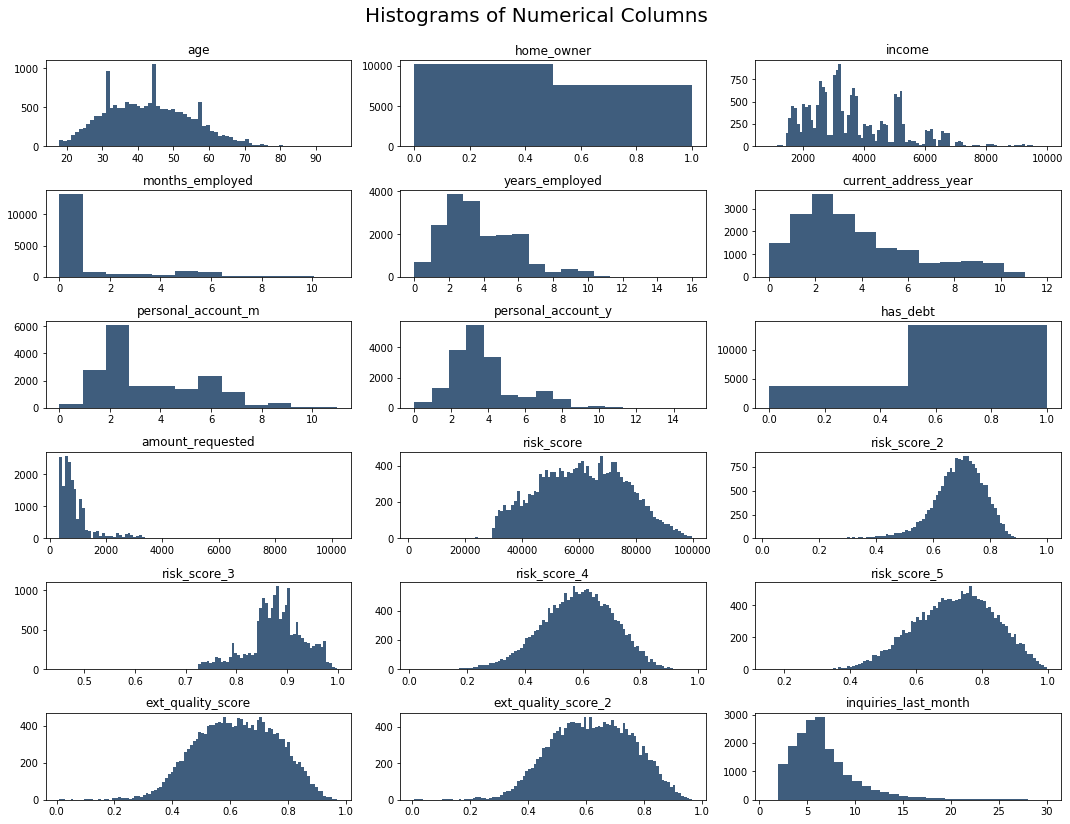

In [33]:
fig = plt.figure(figsize=(15,12))

plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
#Since we want to plot every feature in one single plot, we re going to iterate every feature
for i in range(dataset2.shape[1]):
    #This will iterate every feature.Shape gives the dimensions of the dataframe and he first item gives the number of columns
    #and since python does not include all the columns we are adding 1 to it. 
    plt.subplot(6,3,i+1)
    #Here in subplot, we are going to tell python number of images in the plot.'i' is given to tell what we are 
    #working on the moment
    f = plt.gca()
    #gca() command cleans up everything
    f.set_title(dataset2.columns.values[i])
    #It will title each feature
    
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    #It will tell python how many bins will be in each feature. [:, i-1 ] will query the entire column
    
    plt.hist(dataset2.iloc[:, i], bins = vals, color= '#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


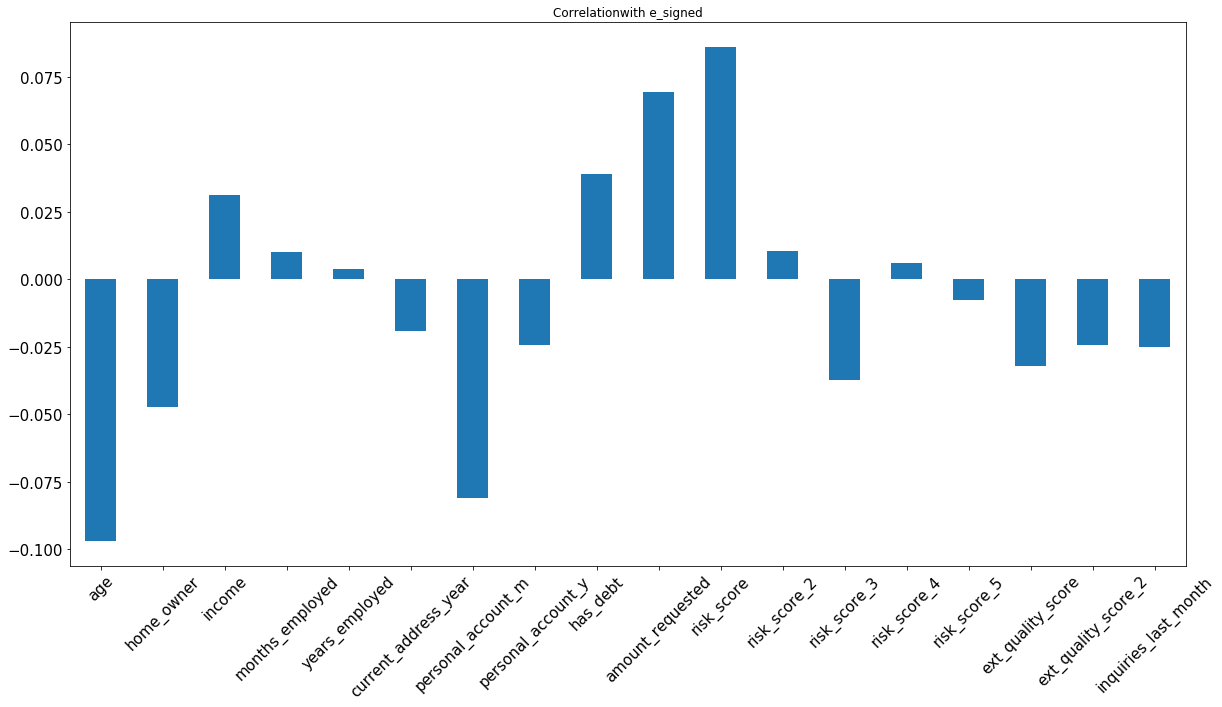

In [34]:
#CORRELATION PLOT

dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize = (20,10), title = "Correlation with e_signed", fontsize = 15, rot = 45)

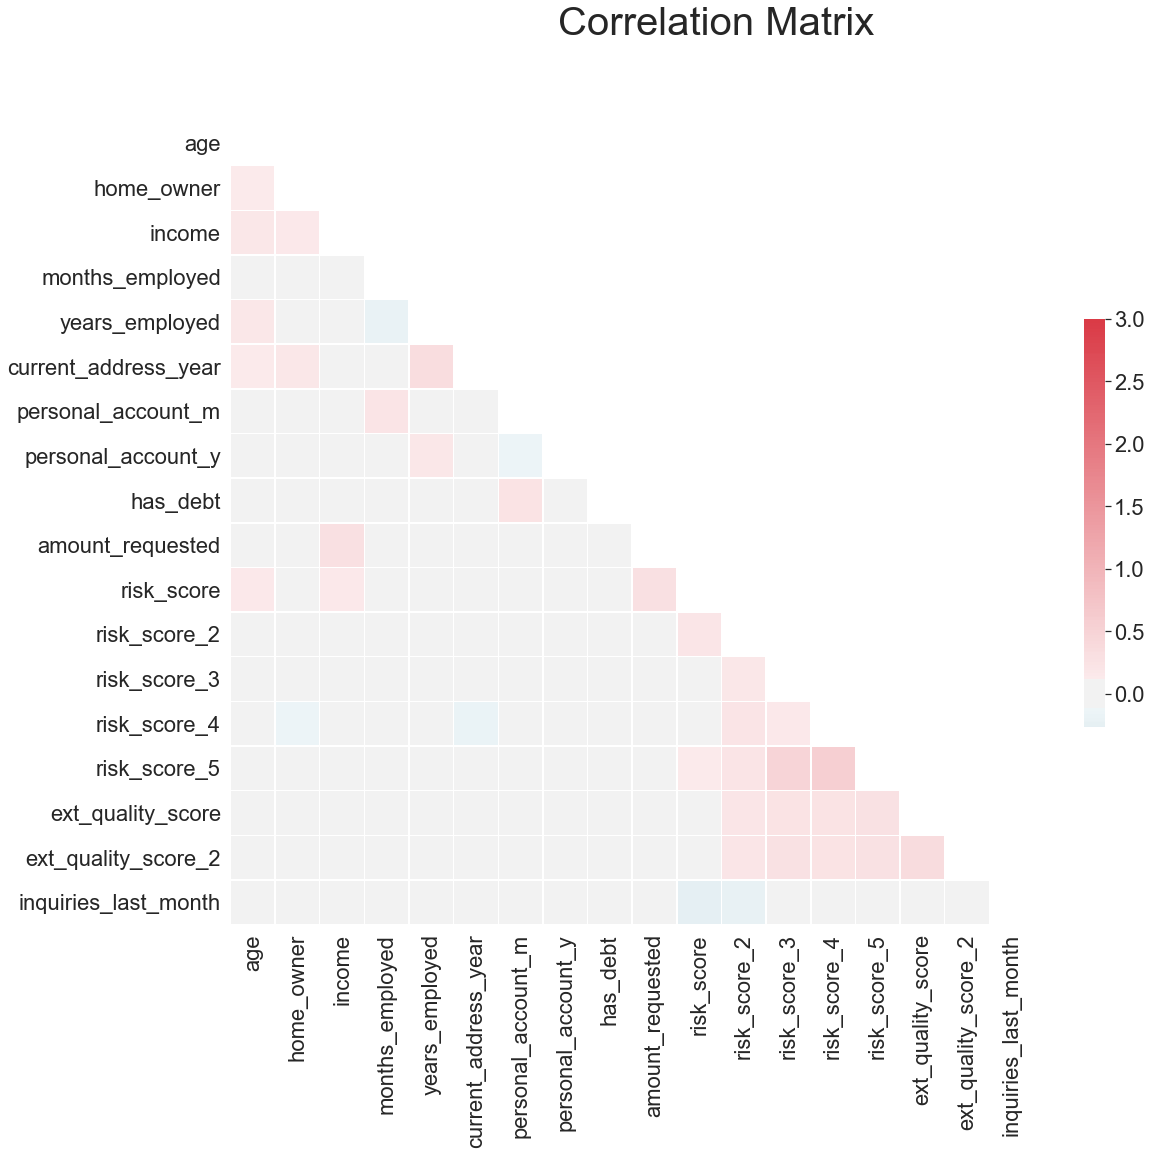

In [35]:
sn.set(style="white", font_scale=2)

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

cmap = sn.diverging_palette(220,10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

In [ ]:
#Feature Engineeringabs


In [37]:
dataset = dataset.drop(columns = ['months_employed'])

In [40]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [42]:
dataset[['personal_account_m' , 'personal_account_y', 'personal_account_months' ]].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [55]:
dataset = dataset.drop(columns= ['personal_account_m','personal_account_y'])

KeyError: "['personal_account_m' 'personal_account_y'] not found in axis"

In [48]:
#One Hot Encoding

dataset = pd.get_dummies(dataset)

In [49]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [51]:
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [57]:
# Removing extra columns

response = dataset["e_signed"]

users = dataset["entry_id"]

dataset = dataset.drop(columns = ['e_signed','entry_id'])

KeyError: 'e_signed'

In [59]:
dataset2

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2
17904,46,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3
17905,46,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9
17906,42,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3


In [62]:
#Splitting into train - test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                   response,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [63]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScalar()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

NameError: name 'StandardScalar' is not defined

In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

#Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Linear Regression (lasso)', acc, prec, f1, rec]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [65]:
#SVM(linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

#Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([['SVM (linear)', acc, prec, f1, rec]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

results = results.append(model_results, ignore_index = True)

NameError: name 'results' is not defined

In [ ]:
#Rbf kernel
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

#Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([['SVM (rbf)', acc, prec, f1, rec]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

results = results.append(model_results, ignore_index = True)

In [ ]:
results

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = SVC(random_state = 0, n_estimator=100,
                criterion='entropy')
classifier.fit(X_train, y_train)

#Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, f1, rec]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

results = results.append(model_results, ignore_index = True)

results

In [ ]:
#K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,  y = y_train, cv = 10)

print("Random Forest Classifier Accuracy: %0.2f (+/-%0.2f)" %(accuracies.mean(), accuracies.std() * 2))

results

In [ ]:
parameters = {"max_depth": [3, None],
              "max_features":[1,5,10],
             "min_samples_split":[2,5,10],
             "min_samples_leaf":[1,5,10],
             "bootstrap":[True, False],
             "criterion":["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv=10,
                          n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf__best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

In [ ]:
#Grid Search 2 and Model Conclusion Left